### Learning Rate Scheduler.
This callback updates the learning rate depending on the schedule function.

```py
tf.keras.callbacks.LearningRateScheduler(
    schedule, verbose=0
)
```

### Imports

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
import numpy as np

### Configuring the ``device`` for the environment.


In [2]:
physical_devices = tf.config.list_physical_devices("GPU")
tf.config.experimental.set_memory_growth(physical_devices[0], True)

### Let's create a model that will train on the `MNIST` dataset.

In [3]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()
X_train.shape

11493376/11490434 [==============================] - 0s 0us/step


(60000, 28, 28)

In [4]:
def normalize(image):
  image = tf.convert_to_tensor(image.astype('float32'))/255
  return image

In [5]:
X_train_tensors =tf.convert_to_tensor(list(map(normalize, X_train)))
X_test_tensors = tf.convert_to_tensor(list(map(normalize, X_test)))

y_test_tensors = tf.convert_to_tensor(y_test)
y_train_tensors = tf.convert_to_tensor(y_train)

In [6]:
y_test_tensors[:2]

<tf.Tensor: shape=(2,), dtype=uint8, numpy=array([7, 2], dtype=uint8)>

A function that will update our `learning_rate`

In [10]:
def schedule(epoch, lr):
  if epoch < 5:
    return lr
  else:
    return lr * 0.01

In [11]:
model = keras.Sequential([
      keras.layers.Input(shape=(28, 28,)),
      keras.layers.Flatten(),
      keras.layers.Dense(64, activation="relu"),
      keras.layers.Dense(128, activation="relu"),
      keras.layers.Dense(10, activation="softmax")
])

model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer="adam",
              metrics=["accuracy"]
              )


lr_scheduler = keras.callbacks.LearningRateScheduler(schedule=schedule, verbose=1)
history =  model.fit(X_train_tensors, y_train_tensors, epochs=10, 
          verbose=1, batch_size=32, 
          validation_data=(X_test_tensors, y_test_tensors),
          callbacks=[lr_scheduler]
          )

Epoch 1/10

Epoch 00001: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2597 - accuracy: 0.9237 - val_loss: 0.1395 - val_accuracy: 0.9569
Epoch 2/10

Epoch 00002: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1129 - accuracy: 0.9653 - val_loss: 0.1034 - val_accuracy: 0.9688
Epoch 3/10

Epoch 00003: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0807 - accuracy: 0.9749 - val_loss: 0.0976 - val_accuracy: 0.9696
Epoch 4/10

Epoch 00004: LearningRateScheduler reducing learning rate to 0.0010000000474974513.
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0637 - accuracy: 0.9798 - val_loss: 0.0844 - val_accuracy: 0.9758
Epoch 5/10

Epoch 00005: LearningRateScheduler reducing learning rate to 0.001000000

### Visualising the Learning rate at each epoch.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
history.history

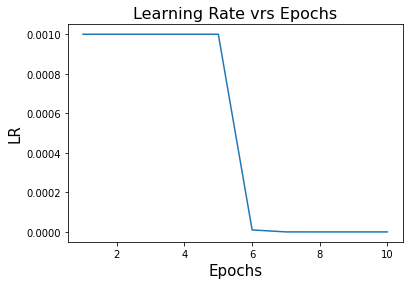

In [18]:
epochs = np.arange(1, 11)
learning_rate = history.history['lr']
plt.title("Learning Rate vrs Epochs", fontsize=16)
plt.plot(epochs, learning_rate)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("LR", fontsize=15)
plt.show()

> More about the [LR Scheduler](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/LearningRateScheduler)